In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\yahya\AppData\Local\Temp\ipykernel_24340\685239024.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


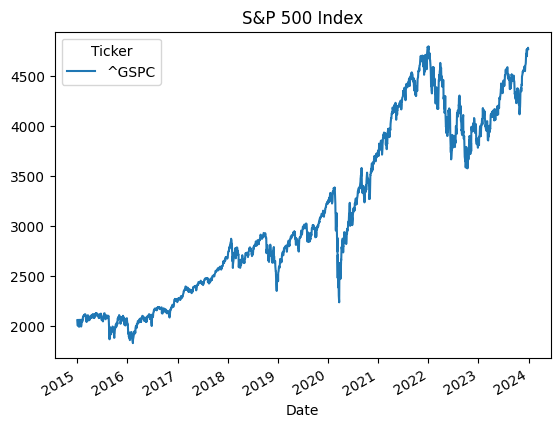

In [6]:
# Download daily prices
data = yf.download("^GSPC", start="2015-01-01", end="2024-01-01")

prices = data["Close"]
prices.plot(title="S&P 500 Index")
plt.show()


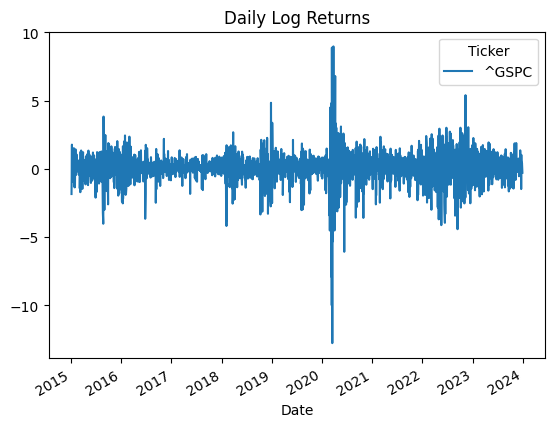

In [9]:
returns = 100 * np.log(prices / prices.shift(1))
returns = returns.dropna()

returns.plot(title="Daily Log Returns")
plt.show()


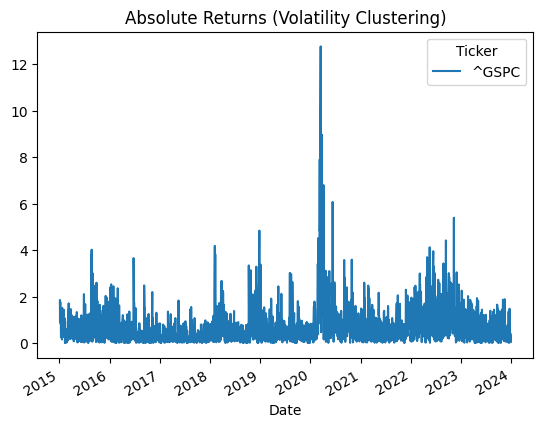

In [10]:
returns.abs().plot(title="Absolute Returns (Volatility Clustering)")
plt.show()


In [11]:
from arch import arch_model

model = arch_model(
    returns,
    mean="Zero",       # mean is ~0 for daily returns
    vol="Garch",
    p=1,
    q=1,
    dist="normal"
)

results = model.fit(update_freq=10)
print(results.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2944.5019760793643
            Iterations: 7
            Function evaluations: 38
            Gradient evaluations: 7
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2944.50
Distribution:                  Normal   AIC:                           5895.00
Method:            Maximum Likelihood   BIC:                           5912.18
                                        No. Observations:                 2263
Date:                Sun, Dec 21 2025   Df Residuals:                     2263
Time:                        17:24:49   Df Model:                            0
                              Volatility Model                              
    

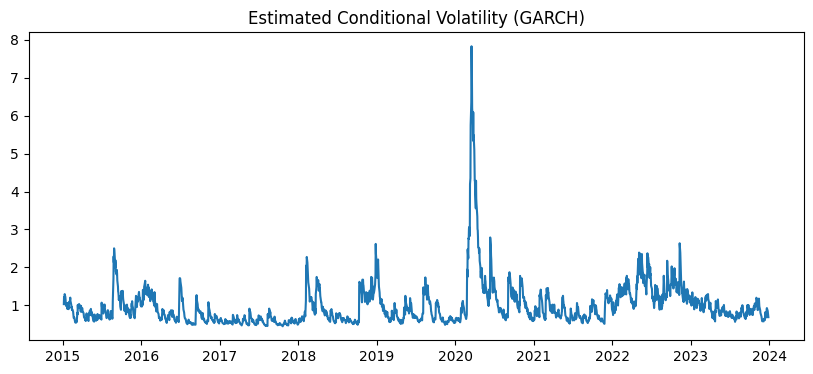

In [12]:
cond_vol = results.conditional_volatility

plt.figure(figsize=(10, 4))
plt.plot(cond_vol)
plt.title("Estimated Conditional Volatility (GARCH)")
plt.show()


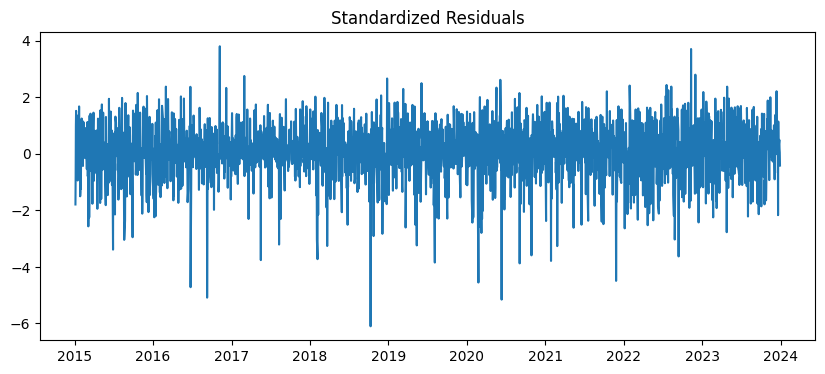

In [13]:
std_resid = results.std_resid

plt.figure(figsize=(10, 4))
plt.plot(std_resid)
plt.title("Standardized Residuals")
plt.show()


In [14]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(std_resid)
print("ARCH test p-value:", arch_test[1])


ARCH test p-value: 0.5963135271461767


In [15]:
forecast = results.forecast(horizon=10)

variance_forecast = forecast.variance.iloc[-1]
vol_forecast = np.sqrt(variance_forecast)

print("10-day volatility forecast:")
print(vol_forecast)


10-day volatility forecast:
h.01    0.652278
h.02    0.671324
h.03    0.689324
h.04    0.706375
h.05    0.722555
h.06    0.737937
h.07    0.752581
h.08    0.766541
h.09    0.779865
h.10    0.792596
Name: 2023-12-29 00:00:00, dtype: float64


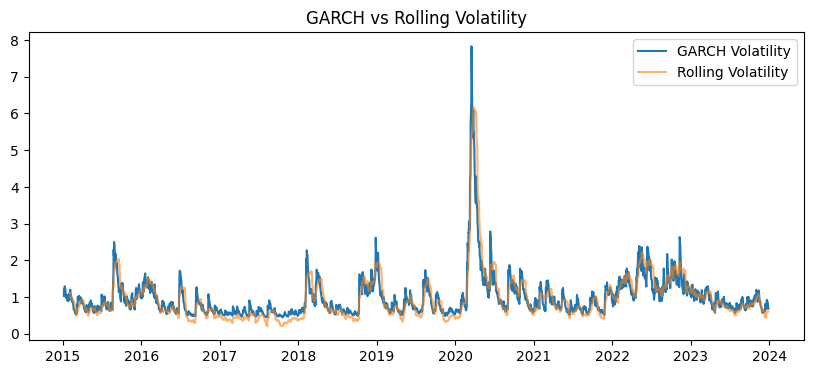

In [16]:
rolling_vol = returns.rolling(20).std()

plt.figure(figsize=(10, 4))
plt.plot(cond_vol, label="GARCH Volatility")
plt.plot(rolling_vol, label="Rolling Volatility", alpha=0.6)
plt.legend()
plt.title("GARCH vs Rolling Volatility")
plt.show()
